In [1]:
# N-gram and Wordcloud coding helping from Clément Delteil
import csv
import chart_studio
import re
import string
# import emot
import collections
import ipywidgets
import contractions
import cufflinks
import nltk.tokenize

import chart_studio.plotly as py
import chart_studio.tools as tls
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

from textblob import TextBlob
#from google.colab import widgets
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

pd.set_option('display.max_colwidth', None)
sid = SentimentIntensityAnalyzer()
# emot_obj = emot.core.emot()
cufflinks.set_config_file(world_readable=True, theme='pearl')
cufflinks.go_offline()
pio.renderers.default = 'colab'

In [2]:
df = pd.read_json("../final_data_for_machine_learning.json")
df = df[(df["identity"]=="lgbt")&(df["score"]==0)]

In [3]:
df.sample(n=5)

,comment,category,channel,video_url,video_id,channel_size,identity,expanded_text,processed_text,score
140719,"this review is all over the place.\n\none second your underplaying moriarty's importance in the original series the next you exaggerating it?\n""this editing is the show makers calling you stupid"" and then ten seconds later ""this editing is really effective at putting you in sherlocks shoes""\n\nits this damned if you do damned if you don't arguing style. really annoying to listen to. Its like you dont have anything to say sometimes and just insult things because a thought popped into your mind. \n\nabout a minute later you have a valid critique of the editing: its overused. you have some great critiques in this review but sometimes you're writing lacks focus.",Education,https://www.youtube.com/@hbomberguy,https://www.youtube.com/watch?v=LkoGBOs5ecM,LkoGBOs5ecM,small,lgbt,"this review is all over the place.\n\none second your underplaying moriarty's importance in the original series the next you exaggerating it?\n""this editing is the show makers calling you stupid"" and then ten seconds later ""this editing is really effective at putting you in sherlocks shoes""\n\nits this damned if you do damned if you do not arguing style. really annoying to listen to. Its like you do not have anything to say sometimes and just insult things because a thought popped into your mind. \n\nabout a minute later you have a valid critique of the editing: its overused. you have some great critiques in this review but sometimes you are writing lacks focus.","this review is all over the place. one second your underplaying moriarty's importance in the original series the next you exaggerating it? ""this editing is the show makers calling you stupid"" and then ten seconds later ""this editing is really effective at putting you in sherlocks shoes"" its this damned if you do damned if you do not arguing style. really annoying to listen to. Its like you do not have anything to say sometimes and just insult things because a thought popped into your mind. about a minute later you have a valid critique of the editing: its overused. you have some great critiques in this review but sometimes you are writing lacks focus.",0
150191,"""Yes hire Hollywood actors that can't Voice Act for their Life, let's not hire Trained & Experienced VAs like Laura Bailey, Troy Baker, Nolan North, Ashley Johnson, Travis Willingham, or any other Experienced Voice Actor.""\nF#ck me man.",Entertainment,https://www.youtube.com/@LindsayEllisVids,https://www.youtube.com/watch?v=nyiBdccfNkg,nyiBdccfNkg,small,lgbt,"""Yes hire Hollywood actors that cannot Voice Act for their Life, let us not hire Trained & Experienced VAs like Laura Bailey, Troy Baker, Nolan North, Ashley Johnson, Travis Willingham, or any other Experienced Voice Actor.""\nF#ck me man.","""Yes hire Hollywood actors that cannot Voice Act for their Life, let us not hire Trained & Experienced VAs like Laura Bailey, Troy Baker, Nolan North, Ashley Johnson, Travis Willingham, or any other Experienced Voice Actor."" F me man.",0
135073,Ohhh the irony!,Comedy,https://www.youtube.com/@shane,https://www.youtube.com/watch?v=xUf2-sjGqQw,xUf2-sjGqQw,small,lgbt,Ohhh the irony!,Ohhh the irony!,0
143573,Wow another good woman down can't watch video,Entertainment,https://www.youtube.com/@andrearussett,https://www.youtube.com/watch?v=xrcuudlqICw,xrcuudlqICw,small,lgbt,Wow another good woman down cannot watch video,Wow another good woman down cannot watch video,0
141581,She must be a pervert that just wants to see people nakid.,Education,https://www.youtube.com/@lacigreen,https://www.youtube.com/watch?v=wh4nUlslmso,wh4nUlslmso,small,lgbt,She must be a pervert that just wants to see people nakid.,She must be a pervert that just wants to see people nakid.,0


In [4]:
# Display the 20 most present bi-grams
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(df['processed_text'], 20)

In [5]:
common_words

[('years ago', 250),
 ('feel like', 160),
 ('trans women', 120),
 ('sounds like', 115),
 ('years later', 109),
 ('did know', 106),
 ('looks like', 106),
 ('tootsie rolls', 106),
 ('trans people', 97),
 ('year old', 89),
 ('sex ed', 88),
 ('look like', 86),
 ('did age', 86),
 ('middle child', 86),
 ('just like', 79),
 ('years old', 79),
 ('people like', 78),
 ('feel bad', 76),
 ('oh god', 76),
 ('does mean', 66)]

In [6]:
df1 = pd.DataFrame(common_words, columns = ['Comment_Text' , 'count'])
df1.head()

,Comment_Text,count
0,years ago,250
1,feel like,160
2,trans women,120
3,sounds like,115
4,years later,109


In [7]:
df1_sorted = df1.sort_values("count")
df1_sorted.head()

,Comment_Text,count
19,does mean,66
17,feel bad,76
18,oh god,76
16,people like,78
15,years old,79


In [8]:
# df1.groupby('Comment_Text').sum()['count'].sort_values(ascending=False).iplot(
#     kind='bar',
#     yTitle='Count',
#     linecolor='black',
#     title='Top 20 bigrams in Comment before removing spams')

<Axes: title={'center': 'LGBT Channels - Top 20 Bigrams from Negative Comments'}, xlabel='Number of Repeats', ylabel='Bigrams'>

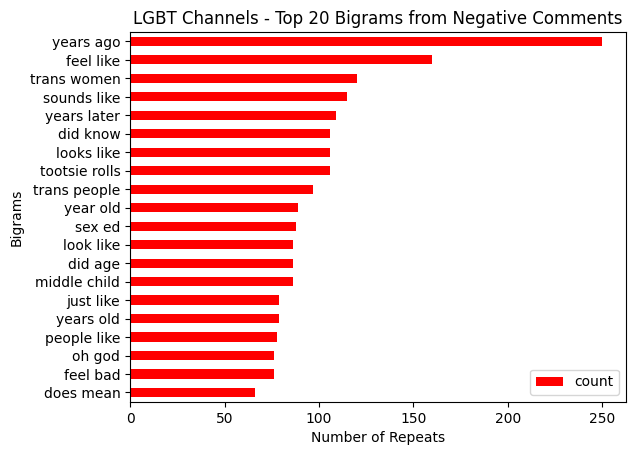

In [9]:
df1_sorted.plot.barh(x="Comment_Text",
                     title="LGBT Channels - Top 20 Bigrams from Negative Comments",
                     ylabel = "Bigrams",
                     xlabel = "Number of Repeats",
                     color = "red")